In [8]:
import numpy as np
import control
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint
import os

SAVE_PATH = 'report/figs/'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)
plt.rcParams['figure.figsize'] = [4, 4]

# Задание 1

In [9]:
gamma = 0.25
x_0 = 1
theta_hat_0 = 1
g_t = lambda t: 0

theta = 8
lambda_ = 2

In [10]:
delta_t = lambda t: (1 + t)**(-1/8)*(1 - theta(1 + t)**(-1/4) - 3/8*(1 + t)**(-5/4))

In [11]:
t_span = [0, 9]

In [12]:
def d_xm(t, x_m, lambda_, g_t):
    return - lambda_ * x_m + lambda_ * g_t(t)

def u_func(t, x, theta, g_t, lambda_):
    return - theta * x - lambda_ * x + lambda_ * g_t(t)

def d_x(t, x, lambda_, g_t, theta, theta_hat):
    return theta * x + u_func(t, x, theta_hat, g_t, lambda_)

def d_theta_hat(x, epsilon, gamma):
    return -gamma * epsilon * x

In [13]:
def system(t, y, lambda_, g_t, gamma, theta):
    x_m, x, theta_hat = y
    return (
        d_xm(t, x_m, lambda_, g_t),
        d_x(t, x, lambda_, g_t, theta, theta_hat),
        d_theta_hat(x, x_m - x, gamma)
    )

Text(0.5, 1.0, '$\\tilde \\theta(t) = \\theta(t) - \\hat \\theta(t)$')

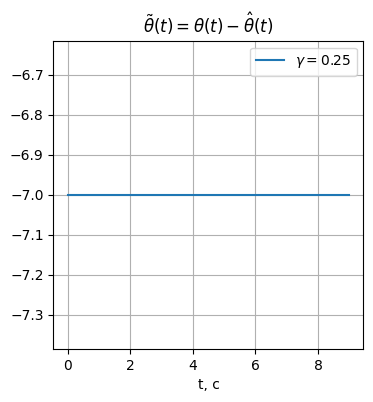

In [14]:
sol_1 = solve_ivp(system, t_span=t_span, t_eval=np.linspace(*t_span, 1000), y0=np.array([1, 0, 1]).T, args=(lambda_, g_t, gamma, theta))

xm, x, theta_hat = sol_1.y
t = sol_1.t

u = u_func(t, x, theta, g_t, lambda_)
plt.plot(sol_1.t, sol_1.y[2] - theta, label=f'$\gamma = {gamma}$')

plt.grid()
plt.legend()
plt.xlabel('t, c')
plt.title('$\\tilde \\theta(t) = \\theta(t) - \\hat \\theta(t)$')

# Задание 2

# Задание 3